## Cargar bibliotecas

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import kstest

## Cargar archivo de Londres

In [30]:
# Cargar los datos
df_london = pd.read_csv(r"C:\Users\Administrator\Documents\ProyectoAirBnB\airbnb_grupo1\data\london_airbnb.csv")

# Muestra las primeras filas
print(df_london.head())

num_filas = df_london.shape[0]
print("Número de filas en el dataset:", num_filas)



      id                                               name  host_id  \
0  11551         Arty and Bright London Apartment in Zone 2    43039   
1  13913                Holiday London DB Room Let-on going    54730   
2  90700                  Sunny Notting Hill flat & terrace   491286   
3  15400                Bright Chelsea  Apartment. Chelsea!    60302   
4  92399  MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...   497366   

       host_name  neighbourhood_group           neighbourhood  latitude  \
0        Adriano                  NaN                 Lambeth  51.46225   
1          Alina                  NaN               Islington  51.56802   
2           Chil                  NaN  Kensington and Chelsea  51.51074   
3       Philippa                  NaN  Kensington and Chelsea  51.48796   
4  Andrea & Mark                  NaN               Islington  51.55071   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -0.11732  Entire home/apt     88     

## Información general del dataframe London

In [4]:
# Información general del dataframe
print(df_london.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85068 entries, 0 to 85067
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              85068 non-null  int64  
 1   name                            85042 non-null  object 
 2   host_id                         85068 non-null  int64  
 3   host_name                       85056 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   85068 non-null  object 
 6   latitude                        85068 non-null  float64
 7   longitude                       85068 non-null  float64
 8   room_type                       85068 non-null  object 
 9   price                           85068 non-null  int64  
 10  minimum_nights                  85068 non-null  int64  
 11  number_of_reviews               85068 non-null  int64  
 12  last_review                     

## Elimino la columna "neighbourhood_group" ya que está vacía

In [5]:
# Eliminar la columna 'neighbourhood_group'
df_london2 = df_london.drop(columns=['neighbourhood_group'])

## Vemos la cantidad de nulos

In [6]:
# Ver la cantidad de valores nulos en cada columna
print(df_london2.isnull().sum())
# Porcentaje de valores nulos en cada columna
porcentaje_nulos = df_london2.isnull().mean() * 100
print(porcentaje_nulos)



id                                    0
name                                 26
host_id                               0
host_name                            12
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       20006
reviews_per_month                 20006
calculated_host_listings_count        0
availability_365                      0
dtype: int64
id                                 0.000000
name                               0.030564
host_id                            0.000000
host_name                          0.014106
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              

## Cambiar los datos que tienen formato fecha a formato float en la columna reviews_per_month

In [7]:
# Función para convertir solo strings a float
def convert_strings_to_float(value):
    if isinstance(value, str):  # Verificar si es un string
        try:
            # Intentar convertir el string a float
            return float(value)  # Convertir directamente a float
        except ValueError:
            return value  # Si no se puede convertir, devolver el valor original
    else:
        return value  # Devolver valores que no son strings

# Aplicar la función a la columna 'last_review'
df_london2['reviews_per_month'] = df_london2['reviews_per_month'].apply(convert_strings_to_float)

# Mostrar el DataFrame resultante
print(df_london2)







             id                                               name    host_id  \
0         11551         Arty and Bright London Apartment in Zone 2      43039   
1         13913                Holiday London DB Room Let-on going      54730   
2         90700                  Sunny Notting Hill flat & terrace     491286   
3         15400                Bright Chelsea  Apartment. Chelsea!      60302   
4         92399  MODERN SELF CONTAINED ARCHITECT FLATLET, ISLIN...     497366   
...         ...                                                ...        ...   
85063  38398365                   Beautiful flat in Central London   24782379   
85064  39869123    Elegant stylish modern house with amazing view!   21145791   
85065  39869214                  Holland Road - Kensington Olympia  251922260   
85066  39869249     Functional single room 18 min to London Bridge  255372486   
85067  39869282  EXQUISITE APARTMENT, PEACEFUL ENVIRONMENT IN SOHO  210531062   

           host_name       

## Verificar si los datos están normalmente distribuidos en la columna last_review

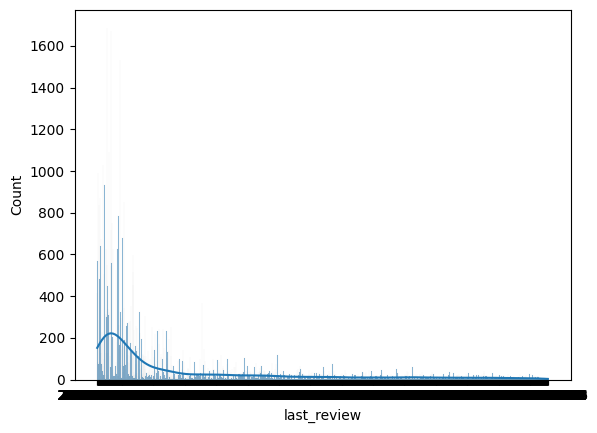

In [8]:

sns.histplot(df_london2['last_review'], kde=True)
plt.show()

## Verificar si los datos están normalmente distribuidos en la columna reviews_per_month

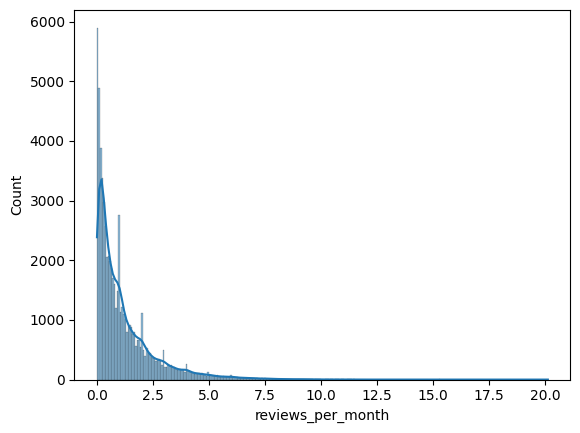

In [9]:
sns.histplot(df_london2['reviews_per_month'], kde=True)
plt.show()

## Utilizo  Prueba de Kolmogorov-Smirnov para normalidad para ver si los datos tienen una distribución normal en la columna last_review
Para poder hacer la imputación

In [15]:
# Convierte la columna 'last_review' a formato datetime si no lo está ya
df_london2['last_review'] = pd.to_datetime(df_london2['last_review'], errors='coerce')

# Convierte la fecha a días desde la primera fecha registrada en la columna
df_london2['days_since_first_review'] = (df_london2['last_review'] - df_london2['last_review'].min()).dt.days


# Prueba de Kolmogorov-Smirnov para normalidad
stat, p = kstest(df_london2['days_since_first_review'].dropna(), 'norm')
print(f"Estadístico: {stat}, p-valor: {p}")

Estadístico: 0.9999846300451877, p-valor: 0.0


## Utilizo  Prueba de Kolmogorov-Smirnov para normalidad para ver si los datos tienen una distribución normal en la columna reviews_per_month
Para poder hacer la imputación 

In [20]:
# Prueba de Kolmogorov-Smirnov para normalidad
stat, p = kstest(df_london2['reviews_per_month'].dropna(), 'norm')
print(f"Estadístico: {stat}, p-valor: {p}")



Estadístico: 0.5075325850273443, p-valor: 0.0


Dado que el resultado de Kolmogorov-Smirnov indica que los datos no están normalmente distribuidos y tengo un 23.517656 % de datos nulos en las columnas last_review y reviews_per_months, la imputación con la media probablemente no sea la opción ideal. La imputación con la mediana es una opción válida y adecuada para datos que no están normalmente distribuidos. La imputación con la moda para la fecha también es válida  para la columna las_review.

## Imputación de valores nulos de la columna last_review con la moda (el valor más frecuente)

In [19]:
# Imputar valores nulos de 'last_review' con la moda (el valor más frecuente)
moda_last_review = df_london2['last_review'].mode()[0]
df_london2['last_review'] = df_london2['last_review'].fillna(moda_last_review)



## Imputación de valores nulos de la columna  con la media reviews_per_month

In [21]:
# Calcular la media de 'reviews_per_month'
media_reviews_per_month = df_london2['reviews_per_month'].mean()

# Imputar valores nulos en 'reviews_per_month' con la media
df_london2['reviews_per_month'] = df_london2['reviews_per_month'].fillna(media_reviews_per_month)


## Verificación de los valores nulos de todo el data frame

In [22]:
# Verificar la cantidad de valores nulos en todo el DataFrame
valores_nulos = df_london2.isnull().sum()

# Mostrar la cantidad de valores nulos por columna
print(valores_nulos)


id                                    0
name                                 26
host_id                               0
host_name                            12
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                           0
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
days_since_first_review           20006
dtype: int64


## Borramos la columna "days_since_first_review" que fue creada para ver si los datos en la columna last_review seguían una distribbución normal

In [23]:
# Borrar la columna 'days_since_first_review'
df_london2.drop(columns=['days_since_first_review'], inplace=True)

## Borramos las filas que tienen valores nulos en las columnas "host_name" y "Name"

In [24]:
df_london2 = df_london2.dropna(subset=['host_name'])

df_london2 = df_london2.dropna(subset=['name'])


## Recuento del número de filas del dataset

In [25]:
num_filas = df_london2.shape[0]
print("Número de filas en el dataset:", num_filas)


Número de filas en el dataset: 85030


## Guardar el dataset resultante

In [29]:
df_london2.to_csv('datos_london2.csv', index=False)